<a href="https://colab.research.google.com/github/ellenne/SeabornIntro/blob/master/LineCharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, you will use your new knowledge to propose a solution to a real-world scenario. To succeed, you will need to import data into Python, answer questions using the data, and generate **line charts** to understand patterns in the data.

## Scenario

You have recently been hired to manage the museums in the City of Los Angeles. Your first project focuses on the four museums pictured in the images below.

You will leverage data from the Los Angeles [Data Portal]

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 1: Load the data

Your first assignment is to read the LA Museum Visitors data file into `museum_data`.  Note that:
- The filepath to the dataset is stored as `museum_filepath`.  Please **do not** change the provided value of the filepath.
- The name of the column to use as row labels is `"Date"`.  (This can be seen in cell A1 when the file is opened in Excel.)

To help with this, you may find it useful to revisit some relevant code from [the tutorial](https://www.kaggle.com/alexisbcook/hello-seaborn), which we have pasted below:

```python
# Path of the file to read
spotify_filepath = "../input/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)
```

The code you need to write now looks very similar!

In [0]:
# Path of the file to read
museum_filepath = "https://raw.githubusercontent.com/ellenne/SeabornIntro/master/05.%20In/museum_visitors.csv"

# Fill in the line below to read the file into a variable museum_data
museum_data = pd.read_csv(museum_filepath, index_col='Date', parse_dates=True)

## Step 2: Review the data

Use a Python command to print the last 5 rows of the data.

In [14]:
# Print the last five rows of the data 
museum_data.tail() # Your code here

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2018-07-01,23136,4191,2620,4718
2018-08-01,20815,4866,2409,3891
2018-09-01,21020,4956,2146,3180
2018-10-01,19280,4622,2364,3775
2018-11-01,17163,4082,2385,4562


The last row (for `2018-11-01`) tracks the number of visitors to each museum in November 2018, the next-to-last row (for `2018-10-01`) tracks the number of visitors to each museum in October 2018, _and so on_.

Use the last 5 rows of the data to answer the questions below.

In [15]:
# Fill in the line below: How many visitors did the Chinese American Museum 
# receive in July 2018?
ca_museum_jul18 = museum_data.iloc[:,2]['2018-07-01']
print(ca_museum_jul18)

# Fill in the line below: In October 2018, how many more visitors did Avila 
# Adobe receive than the Firehouse Museum?
avila_oct18 = museum_data.iloc[:,0]['2018-10-01'] - museum_data.iloc[:,1]['2018-10-01']
print(avila_oct18)


2620
14658


## Step 3: Convince the museum board 

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

To show the museum board how the event compared to regular traffic at each museum, create a line chart that shows how the number of visitors to each museum evolved over time.  Your figure should have four lines (one for each museum).

Text(0.5, 1.0, 'Monthly Visitors to Los Angeles City Museums')

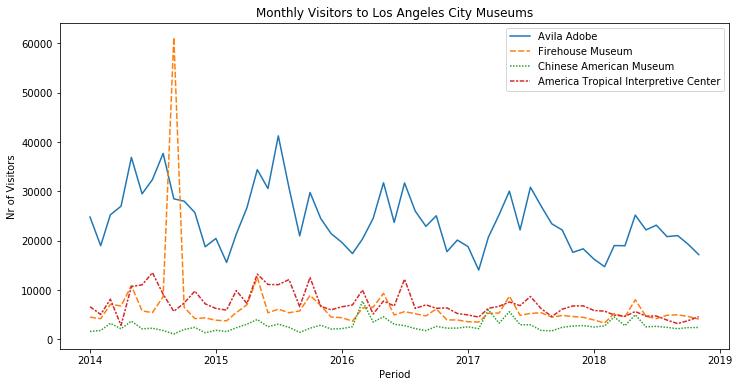

In [16]:
# Line chart showing the number of visitors to each museum over time
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=museum_data) # Your code here
ax.set(xlabel='Period', ylabel='Nr of Visitors')
# Add title
plt.title("Monthly Visitors to Los Angeles City Museums")

## Step 4: Assess seasonality

When meeting with the employees at Avila Adobe, you hear that one major pain point is that the number of museum visitors varies greatly with the seasons, with low seasons (when the employees are perfectly staffed and happy) and also high seasons (when the employees are understaffed and stressed).  You realize that if you can predict these high and low seasons, you can plan ahead to hire some additional seasonal employees to help out with the extra work.

#### Part A
Create a line chart that shows how the number of visitors to Avila Adobe has evolved over time.  (_If your code returns an error, the first thing that you should check is that you've spelled the name of the column correctly!  You must write the name of the column exactly as it appears in the dataset._)

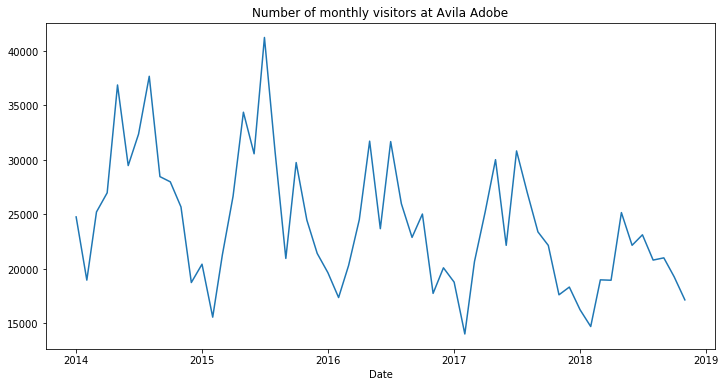

In [17]:
# Line plot showing the number of visitors to Avila Adobe over time
# Note since his objective is to study the seasonality the figure is created with a higher lenght than width
plt.figure(figsize=(12,6))
# Add title
plt.title("Number of monthly visitors at Avila Adobe")
sns.lineplot(data=museum_data.iloc[:,0]) # Your code here
plt.xlabel('Date')

# Check your answer
plt.show()

#### Part B

Does Avila Adobe get more visitors:
- in September-February (in LA, the fall and winter months), or 
- in March-August (in LA, the spring and summer)?  

Using this information, when should the museum staff additional seasonal employees?

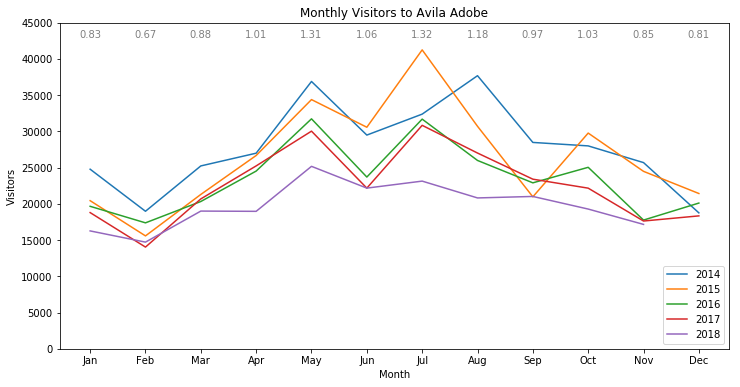

In [18]:
import calendar
import numpy as np
avilaVisitors = museum_data.iloc[:,0]
overall_avg = avilaVisitors.mean()
months = range(1, 13)
MM = []
YY = []
MMM = []
MMMM = []
for i in range(len(avilaVisitors)):
    MM.append(((avilaVisitors.index[i]).to_pydatetime()).month)
    YY.append(((avilaVisitors.index[i]).to_pydatetime()).year)    
MMMM = [calendar.month_name[i] for i in MM]
MMM = [x[:3] for x in MMMM]

cats = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

avilaVisitorsDF = pd.DataFrame()
avilaVisitorsDF['Visitors'] = avilaVisitors
avilaVisitorsDF['MM'] = MM
avilaVisitorsDF['MMMM'] = MMMM
avilaVisitorsDF['MMM'] = MMM
avilaVisitorsDF['MMM'] = pd.Categorical(avilaVisitorsDF['MMM'], ordered=True, categories=cats)
avilaVisitorsDF['YY'] = YY
avilaVisitorsDF.index = avilaVisitors.index

seasonality_idx = (avilaVisitorsDF.groupby('MM')).Visitors.mean() / overall_avg

fig, ax = plt.subplots(figsize=(12,6))
plt.title("Monthly Visitors to Avila Adobe")

sns.lineplot(x = 'MMM', y = 'Visitors', data=avilaVisitorsDF[avilaVisitorsDF['YY'] == 2014], label='2014')
sns.lineplot(x = 'MMM', y = 'Visitors', data=avilaVisitorsDF[avilaVisitorsDF['YY'] == 2015], label='2015')
sns.lineplot(x = 'MMM', y = 'Visitors', data=avilaVisitorsDF[avilaVisitorsDF['YY'] == 2016], label='2016')
sns.lineplot(x = 'MMM', y = 'Visitors', data=avilaVisitorsDF[avilaVisitorsDF['YY'] == 2017], label='2017')
sns.lineplot(x = 'MMM', y = 'Visitors', data=avilaVisitorsDF[avilaVisitorsDF['YY'] == 2018], label='2018')

style = dict(size=10, color='gray')
for month in cats:
    ax.text(month, 43000, str(seasonality_idx[cats.index(month)+1])[:4], ha='center', **style)

ax.set(ylim=(0, 45000))

plt.xlabel("Month")
plt.ylabel("Visitors")
plt.legend(loc='lower right')

plt.show()